In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer


import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
features = pd.read_csv("features.csv.xls")

In [6]:
features.shape

(8190, 12)

In [7]:
stores = pd.read_csv("stores.csv.xls")

In [8]:
stores.shape

(45, 3)

In [9]:
train = pd.read_csv("train.csv.xls")

In [10]:
train.shape

(421570, 5)

In [11]:
# Merge train with features on 'Store'
df = pd.merge(train, features, how="inner")

In [12]:
# Merge the result with stores on 'Store'
df = pd.merge(df, stores, on="Store", how="inner")

In [13]:
df.shape

(421570, 16)

In [14]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [16]:
# Convert the Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [17]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [18]:
df[['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']].isnull().sum().mean()

np.float64(284486.2)

In [19]:
# fill the nulls whit 0
df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

In [20]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [21]:
df = df.loc[df['Weekly_Sales'] > 0]

In [22]:
num_columns_means = df.select_dtypes(include=np.number).mean()
num_columns_means

,0
Store,22.195611
Dept,44.241309
Weekly_Sales,16033.114591
Temperature,60.090599
Fuel_Price,3.360890
MarkDown1,2590.323565
MarkDown2,878.905242
MarkDown3,468.845949
MarkDown4,1083.534361
MarkDown5,1662.805002


In [23]:
num_columns_median = df.select_dtypes(include=np.number).median()
num_columns_median

,0
Store,22.000000
Dept,37.000000
Weekly_Sales,7661.700000
Temperature,62.090000
Fuel_Price,3.452000
MarkDown1,0.000000
MarkDown2,0.000000
MarkDown3,0.000000
MarkDown4,0.000000
MarkDown5,0.000000


In [24]:
mode_values = df.mode().iloc[0]
mode_values

,0
Store,13.0
Dept,1
Date,2011-12-23 00:00:00
Weekly_Sales,10.0
IsHoliday,False
Temperature,50.43
Fuel_Price,3.638
MarkDown1,0.0
MarkDown2,0.0
MarkDown3,0.0


In [25]:
df.drop(['Date','Type'], axis=1).skew()

,0
Store,0.077947
Dept,0.359016
Weekly_Sales,3.258942
IsHoliday,3.360255
Temperature,-0.321295
Fuel_Price,-0.104678
MarkDown1,4.730933
MarkDown2,10.649277
MarkDown3,14.908890
MarkDown4,8.075125


In [26]:
df.drop(['Date','Type'], axis=1).kurt()

,0
Store,-1.146698
Dept,-1.216644
Weekly_Sales,21.460793
IsHoliday,9.291355
Temperature,-0.636128
Fuel_Price,-1.185445
MarkDown1,34.912307
MarkDown2,145.568291
MarkDown3,247.647517
MarkDown4,86.188903


In [27]:
df.drop(['Date','Type'], axis=1).corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.059970,-0.033727,-0.020301,-0.042808,-0.012605,-0.211261,0.208759,-0.182763
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,0.001454,0.000435,0.001517,0.001881,0.002766,-0.007178,0.007787,-0.002491
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,0.047249,0.020948,0.038522,0.037470,0.050598,-0.021162,-0.025806,0.244117
IsHoliday,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,-0.003517,0.207326,0.266731,0.011625,-0.015186,-0.001933,0.010555,0.000797
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,-0.026428,-0.179684,-0.056016,-0.050323,-0.014847,0.182223,0.096768,-0.058413
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,0.297075,0.029282,0.018646,0.166645,0.215588,-0.164199,-0.033915,0.003632
MarkDown1,-0.059970,0.001454,0.047249,-0.003517,-0.026428,0.297075,1.000000,0.175005,-0.014425,0.838866,0.415271,0.010915,-0.105257,0.169891
MarkDown2,-0.033727,0.000435,0.020948,0.207326,-0.179684,0.029282,0.175005,1.000000,-0.006090,0.113446,0.131847,-0.003694,-0.041497,0.078392
MarkDown3,-0.020301,0.001517,0.038522,0.266731,-0.056016,0.018646,-0.014425,-0.006090,1.000000,-0.012031,0.042542,-0.005959,-0.018078,0.033671
MarkDown4,-0.042808,0.001881,0.037470,0.011625,-0.050323,0.166645,0.838866,0.113446,-0.012031,1.000000,0.303536,-0.002061,-0.076583,0.127415


In [28]:
numerical_columns = df.select_dtypes(include=np.number).columns

In [29]:
num_data = df.select_dtypes(include = np.number)
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [30]:
df = df[(df['Store'] > lower_bound['Store']) & (df['Store'] < upper_bound['Store'])]
df.reset_index(drop=True, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

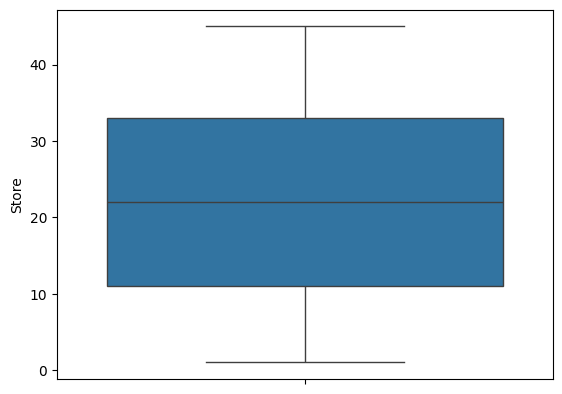

In [31]:
sns.boxplot(df['Store'])
plt.show

In [32]:
df = df[(df['Dept'] > lower_bound['Dept']) & (df['Dept'] < upper_bound['Dept'])]
df.reset_index(drop=True, inplace=True)

In [33]:
df = df[(df['Weekly_Sales'] > lower_bound['Weekly_Sales']) & (df['Weekly_Sales'] < upper_bound['Weekly_Sales'])]
df.reset_index(drop=True, inplace=True)

In [34]:
df = df[(df['Temperature'] > lower_bound['Temperature']) & (df['Temperature'] < upper_bound['Temperature'])]
df.reset_index(drop=True, inplace=True)

In [35]:
df = df[(df['Fuel_Price'] > lower_bound['Fuel_Price']) & (df['Fuel_Price'] < upper_bound['Fuel_Price'])]
df.reset_index(drop=True, inplace=True)

In [36]:
df = df[(df['MarkDown1'] > lower_bound['MarkDown1']) & (df['MarkDown1'] < upper_bound['MarkDown1'])]
df.reset_index(drop=True, inplace=True)

In [37]:
df = df[(df['MarkDown2'] > lower_bound['MarkDown2']) & (df['MarkDown2'] < upper_bound['MarkDown2'])]
df.reset_index(drop=True, inplace=True)

In [38]:
df = df[(df['MarkDown3'] > lower_bound['MarkDown3']) & (df['MarkDown3'] < upper_bound['MarkDown3'])]
df.reset_index(drop=True, inplace=True)

In [39]:
df = df[(df['MarkDown4'] > lower_bound['MarkDown4']) & (df['MarkDown4'] < upper_bound['MarkDown4'])]
df.reset_index(drop=True, inplace=True)

In [40]:
df = df[(df['MarkDown5'] > lower_bound['MarkDown5']) & (df['MarkDown5'] < upper_bound['MarkDown5'])]
df.reset_index(drop=True, inplace=True)

In [41]:
df = df[(df['CPI'] > lower_bound['CPI']) & (df['CPI'] < upper_bound['CPI'])]
df.reset_index(drop=True, inplace=True)

In [42]:
df = df[(df['Size'] > lower_bound['Size']) & (df['Size'] < upper_bound['Size'])]
df.reset_index(drop=True, inplace=True)

In [43]:
df['Weekly_Sales']


,Weekly_Sales
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90
...,...
264100,1058.84
264101,1167.90
264102,749.18
264103,1061.02


<Axes: >

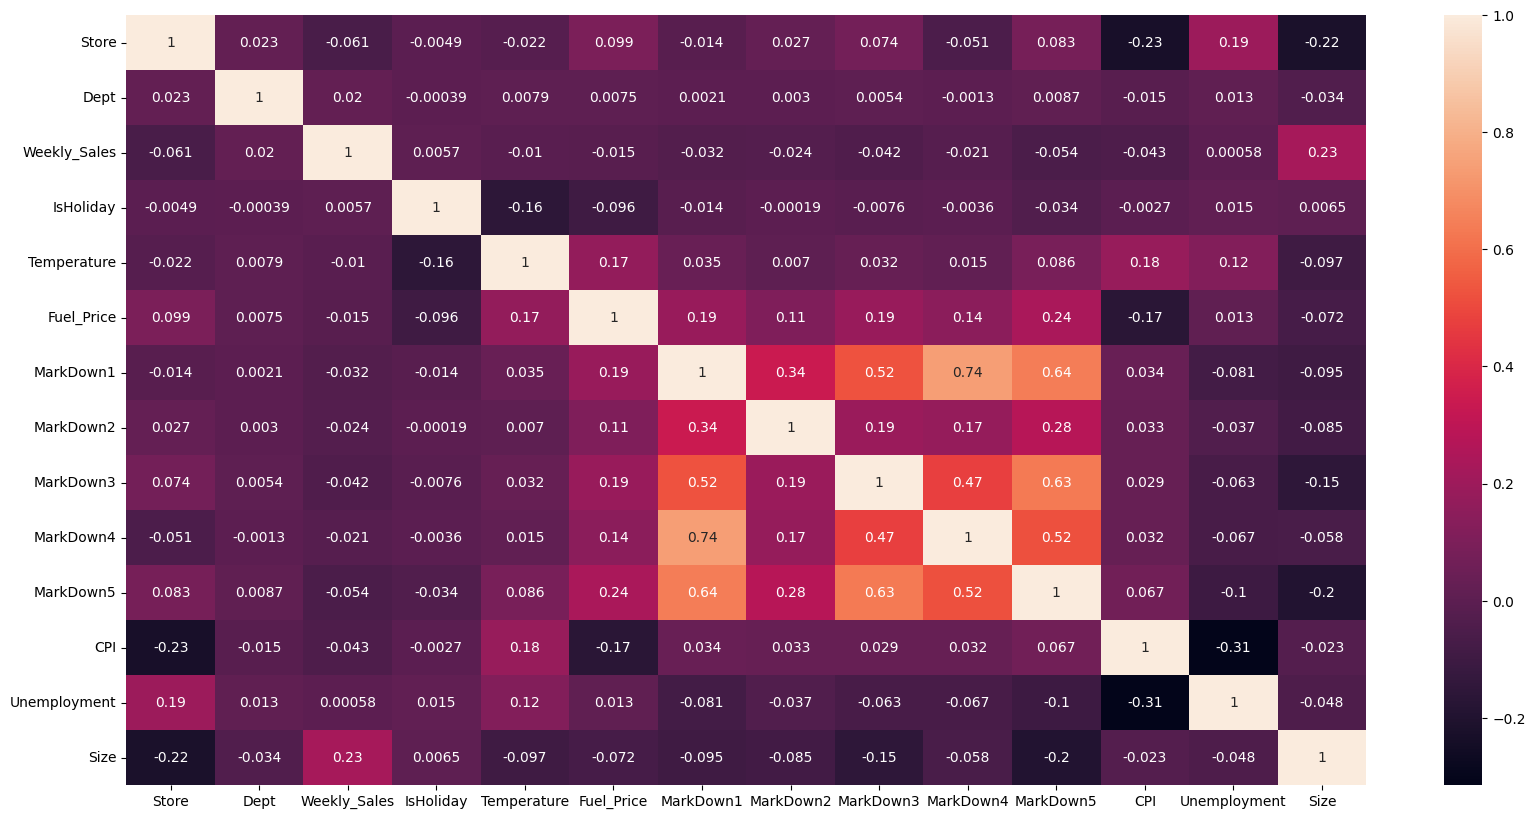

In [44]:
plt.figure(figsize=[20,10])
sns.heatmap(df.drop(['Date','Type'], axis=1).corr(), annot = True)

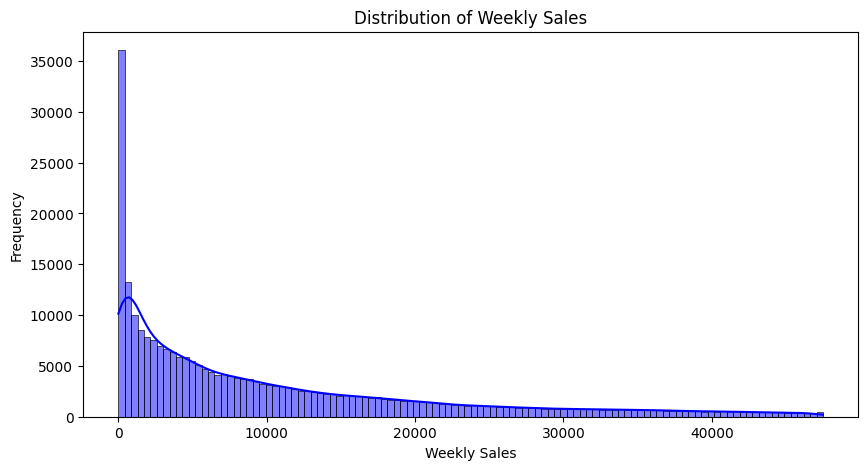

In [45]:
# Plot histogram & KDE for Weekly Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Weekly_Sales'], kde=True, color='blue')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


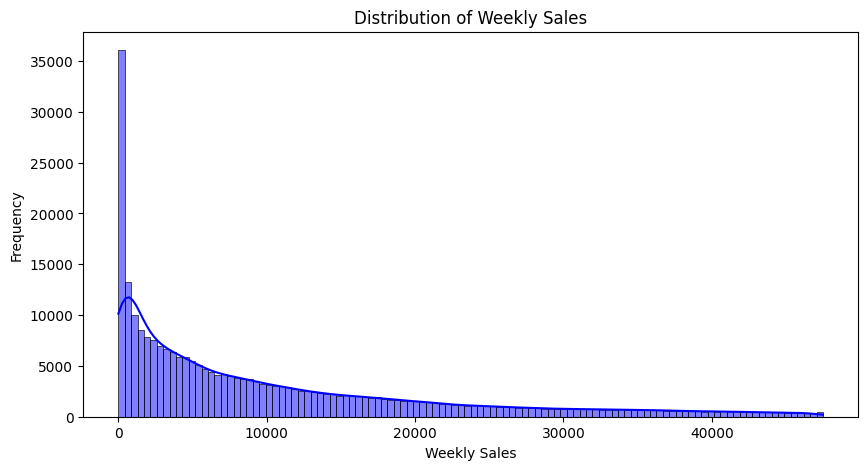

In [46]:
# Plot histogram & KDE for Weekly Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Weekly_Sales'], kde=True, color='blue')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


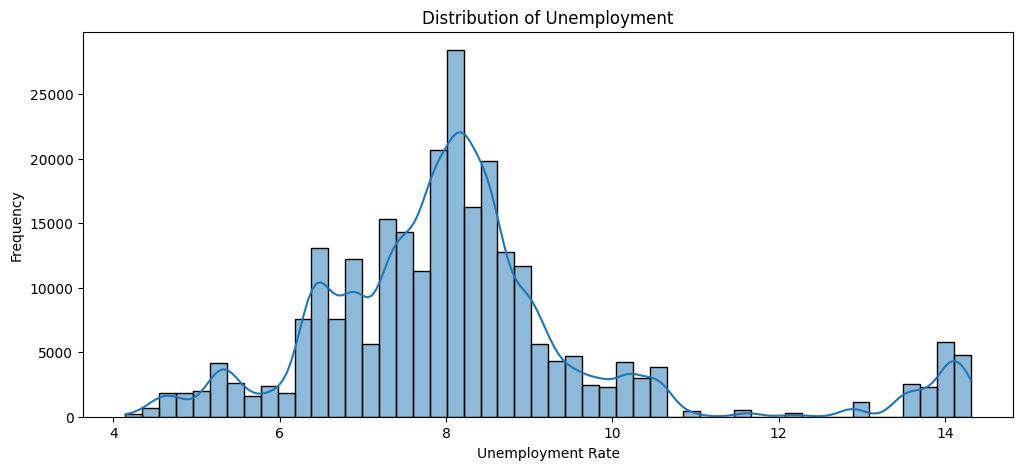

In [47]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Unemployment'], bins=50, kde=True)
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

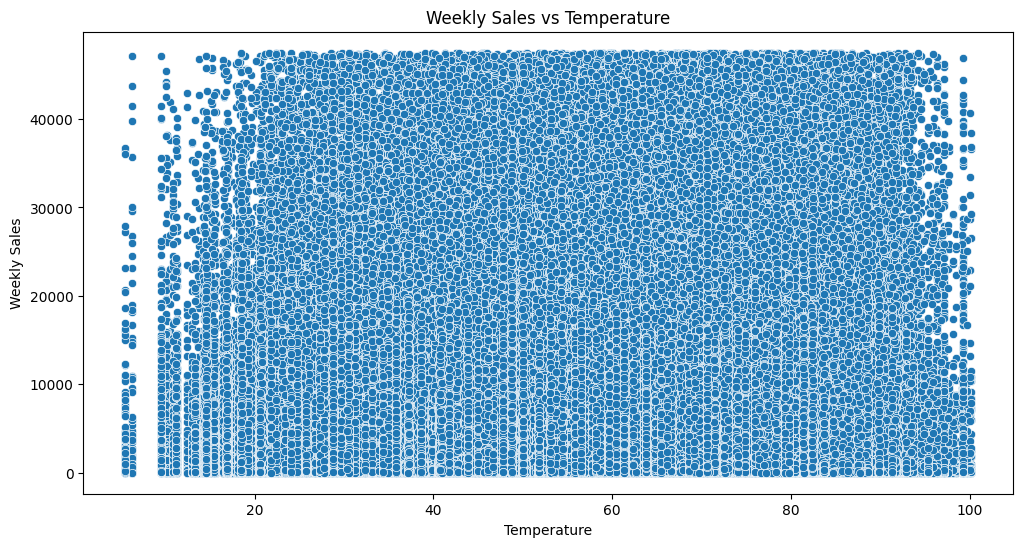

In [48]:
# Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'])
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

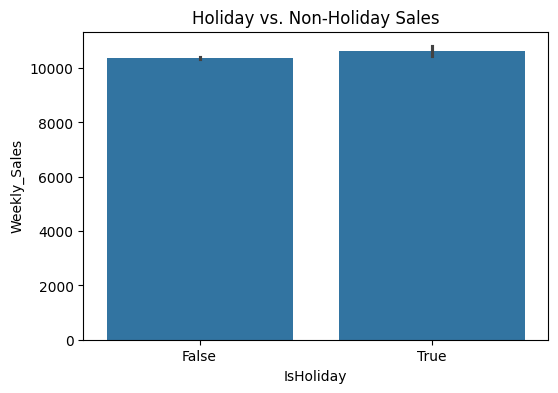

In [49]:
plt.figure(figsize=(6, 4))
sns.barplot(x="IsHoliday", y="Weekly_Sales", data=df)
plt.title("Holiday vs. Non-Holiday Sales")
plt.show()

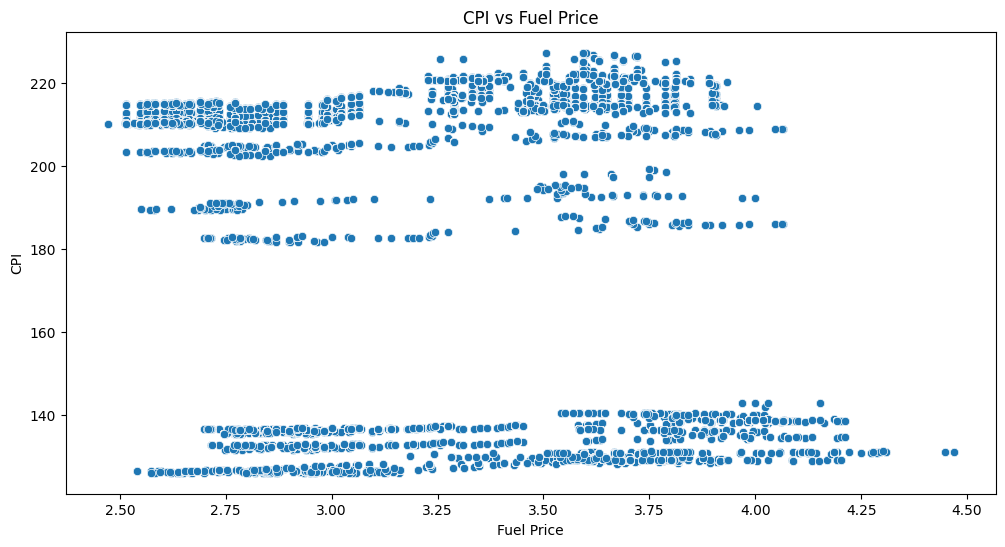

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Fuel_Price'], y=df['CPI'])
plt.title('CPI vs Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('CPI')
plt.show()

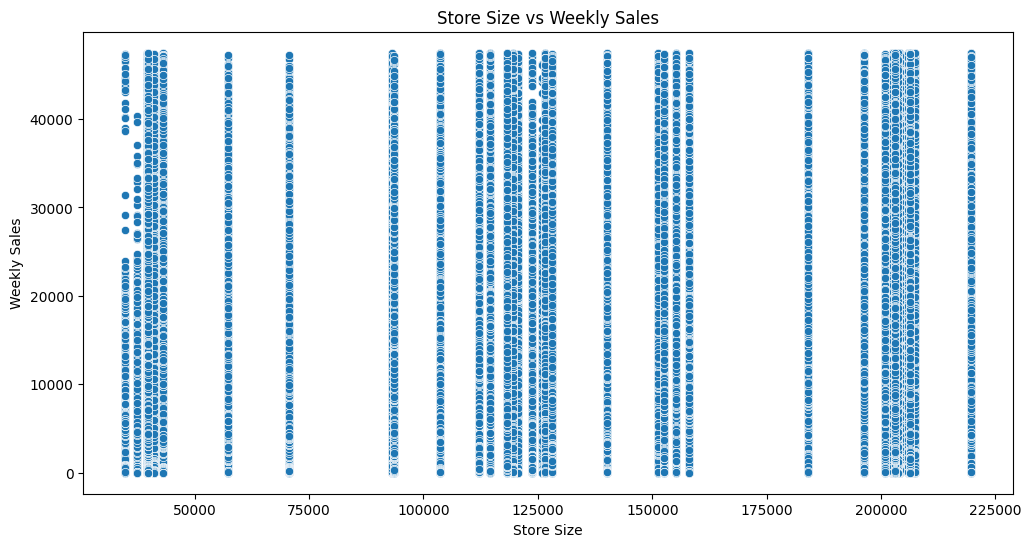

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Size'], y=df['Weekly_Sales'])
plt.title('Store Size vs Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.show()

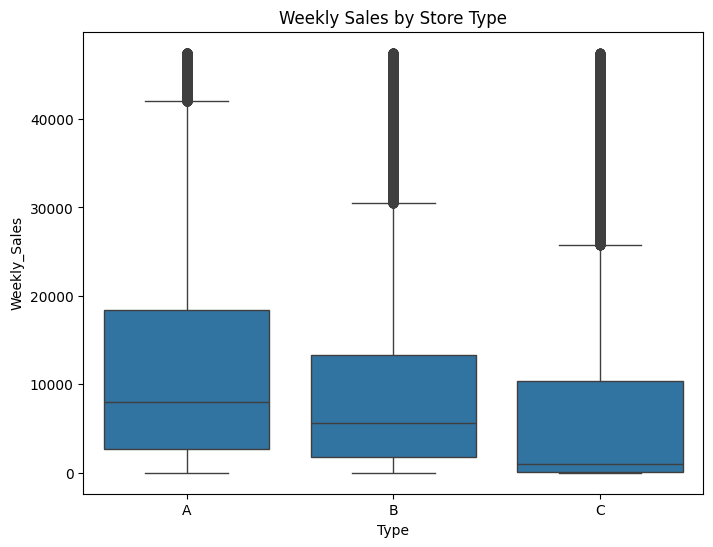

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store Type')
plt.show()

In [53]:
#Multivariate

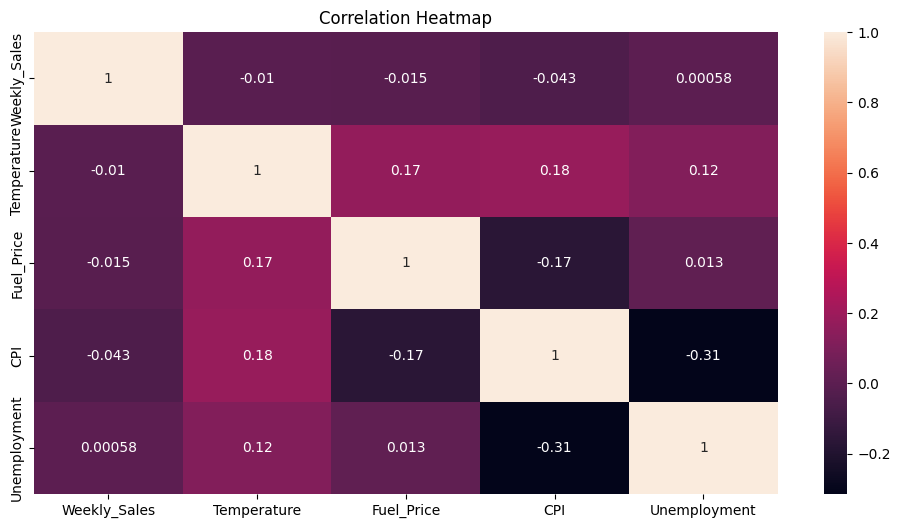

In [54]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

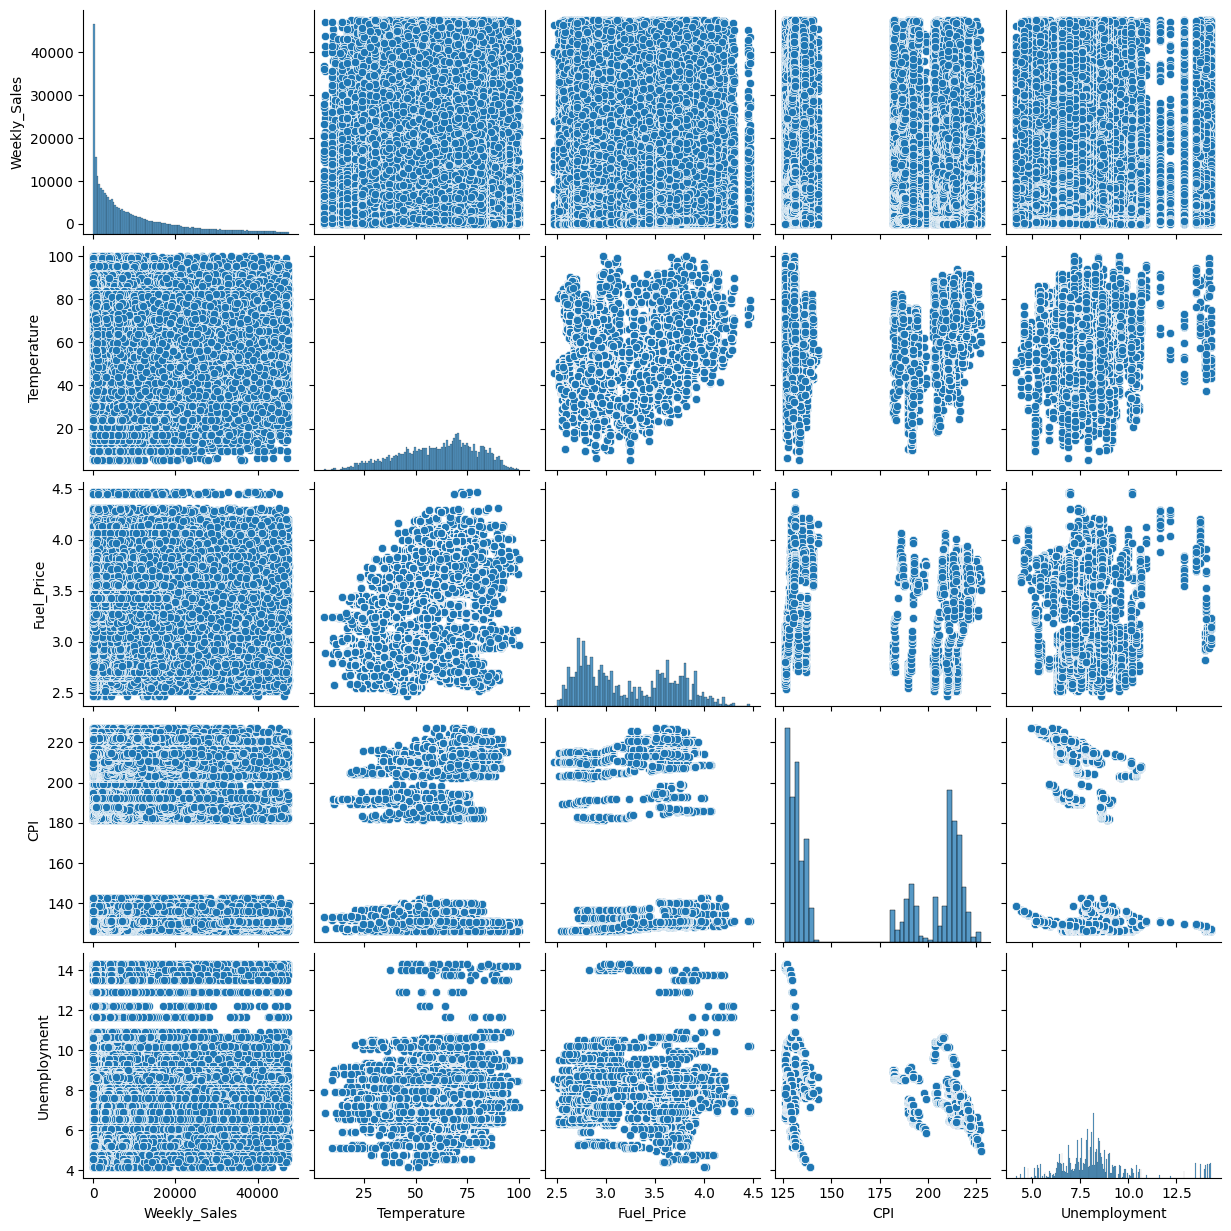

In [55]:
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

<Axes: xlabel='MarkDown1', ylabel='MarkDown5'>

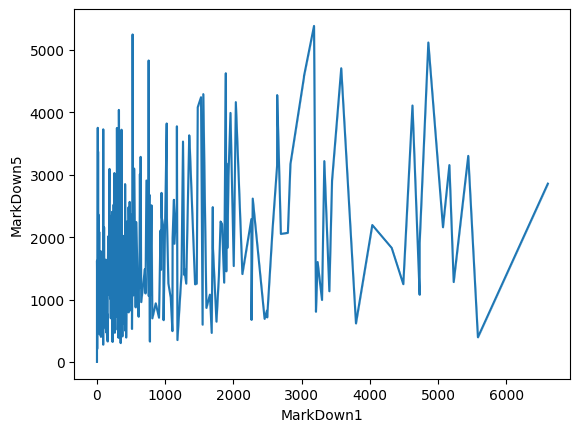

In [56]:
sns.lineplot(x=df["MarkDown1"], y=df["MarkDown5"])

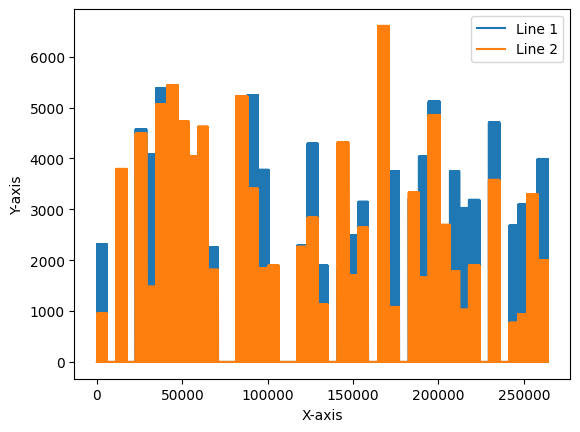

In [57]:
plt.plot(df["MarkDown5"], label='Line 1')
plt.plot(df["MarkDown1"], label='Line 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

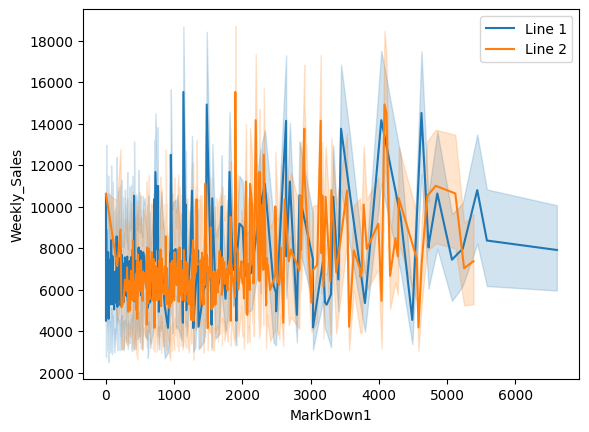

In [58]:
sns.lineplot(x=df["MarkDown1"],y=df["Weekly_Sales"], label='Line 1')
sns.lineplot(x=df["MarkDown5"],y=df["Weekly_Sales"], label='Line 2')
plt.show()

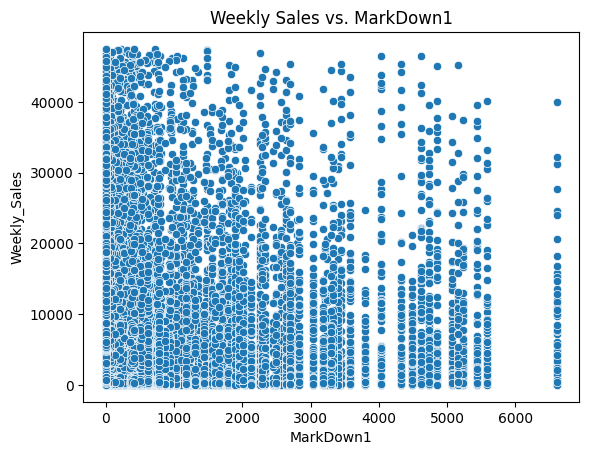

In [59]:
sns.scatterplot(x=df["MarkDown1"], y=df["Weekly_Sales"])
plt.title("Weekly Sales vs. MarkDown1")
plt.show()

In [60]:
# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day

In [61]:
df.drop(['Date'], axis=1, inplace = True)

In [62]:
n_data = df.copy()

In [63]:
n_data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,5


In [64]:
# Encoding categorical variables
label_encoder = LabelEncoder()
n_data['IsHoliday'] = label_encoder.fit_transform(n_data['IsHoliday'])
n_data['Type'] = label_encoder.fit_transform(n_data['Type'])

In [65]:
n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264105 entries, 0 to 264104
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         264105 non-null  int64  
 1   Dept          264105 non-null  int64  
 2   Weekly_Sales  264105 non-null  float64
 3   IsHoliday     264105 non-null  int64  
 4   Temperature   264105 non-null  float64
 5   Fuel_Price    264105 non-null  float64
 6   MarkDown1     264105 non-null  float64
 7   MarkDown2     264105 non-null  float64
 8   MarkDown3     264105 non-null  float64
 9   MarkDown4     264105 non-null  float64
 10  MarkDown5     264105 non-null  float64
 11  CPI           264105 non-null  float64
 12  Unemployment  264105 non-null  float64
 13  Type          264105 non-null  int64  
 14  Size          264105 non-null  int64  
 15  Year          264105 non-null  int32  
 16  Month         264105 non-null  int32  
 17  Week          264105 non-null  UInt32 
 18  Day 

In [66]:
X = n_data.drop(columns=['Weekly_Sales'])
y = n_data['Weekly_Sales']

In [67]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

      Store      Dept  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0 -1.695481 -1.407408  -0.260348    -0.983003   -1.419620  -0.151718   
1 -1.695481 -1.407408   3.841010    -1.185048   -1.471450  -0.151718   
2 -1.695481 -1.407408  -0.260348    -1.109547   -1.544877  -0.151718   
3 -1.695481 -1.407408  -0.260348    -0.753311   -1.443376  -0.151718   
4 -1.695481 -1.407408  -0.260348    -0.760223   -1.305161  -0.151718   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  \
0  -0.086448  -0.170193  -0.116264   -0.21787  1.065027     -0.064054   
1  -0.086448  -0.170193  -0.116264   -0.21787  1.068788     -0.064054   
2  -0.086448  -0.170193  -0.116264   -0.21787  1.070000     -0.064054   
3  -0.086448  -0.170193  -0.116264   -0.21787  1.070787     -0.064054   
4  -0.086448  -0.170193  -0.116264   -0.21787  1.071574     -0.064054   

       Type      Size      Year     Month      Week       Day  
0 -0.935436  0.353793 -0.952309 -1.439331 -1.538010 -1.213325  


In [68]:
# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

vif_data

,Feature,VIF
0,Store,1.173848
1,Dept,1.001685
2,IsHoliday,1.141760
3,Temperature,1.467765
4,Fuel_Price,6.536287
5,MarkDown1,3.016016
6,MarkDown2,1.168387
7,MarkDown3,1.823749
8,MarkDown4,2.335026
9,MarkDown5,2.671449


In [69]:
X_scaled.drop(['Month','Week','Day'], axis=1, inplace = True)

In [70]:
# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

vif_data

,Feature,VIF
0,Store,1.170501
1,Dept,1.001682
2,IsHoliday,1.034372
3,Temperature,1.211068
4,Fuel_Price,4.661124
5,MarkDown1,3.009183
6,MarkDown2,1.166957
7,MarkDown3,1.805669
8,MarkDown4,2.327931
9,MarkDown5,2.598611


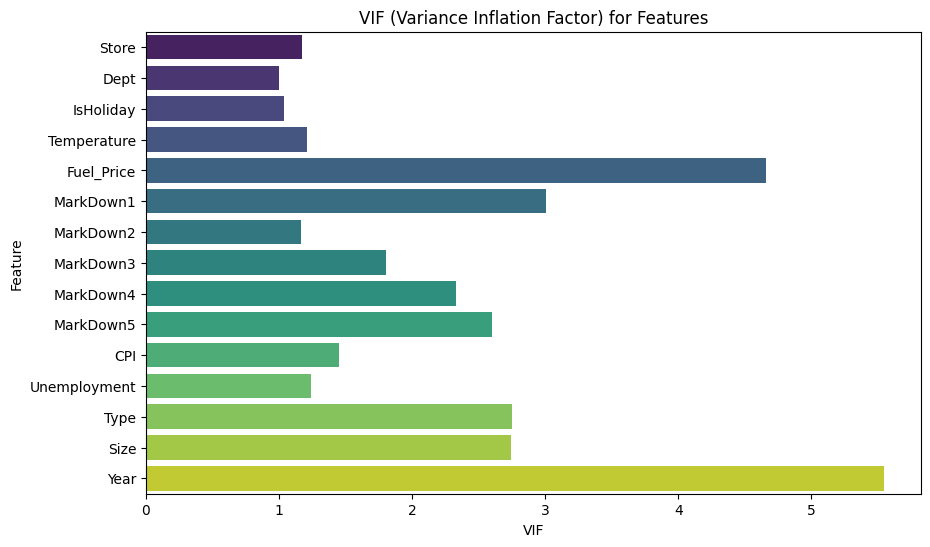

In [71]:
# VIF Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data, palette="viridis") # Changed 'feature' to 'Feature'
plt.title("VIF (Variance Inflation Factor) for Features")
plt.show()

In [72]:
# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [74]:
# Scaling
scaler = StandardScaler()
X = n_data.drop(columns=[n_data.columns[-1]])  # features
y = n_data[n_data.columns[-1]]  # target

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [75]:
# Train Model
rf = RandomForestRegressor(n_estimators=40, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Random Forest - Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

Random Forest - Train R²: 0.8628, Test R²: 0.8605



--- Linear Regression ---
Linear Regression R2: 0.055414957577262336


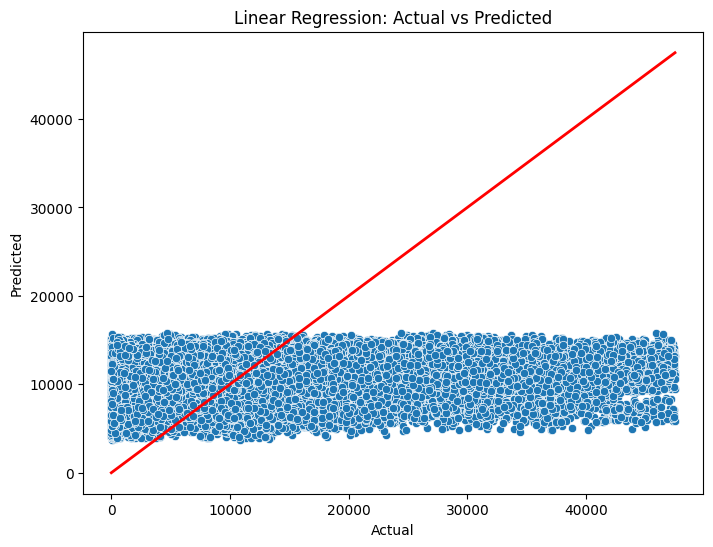

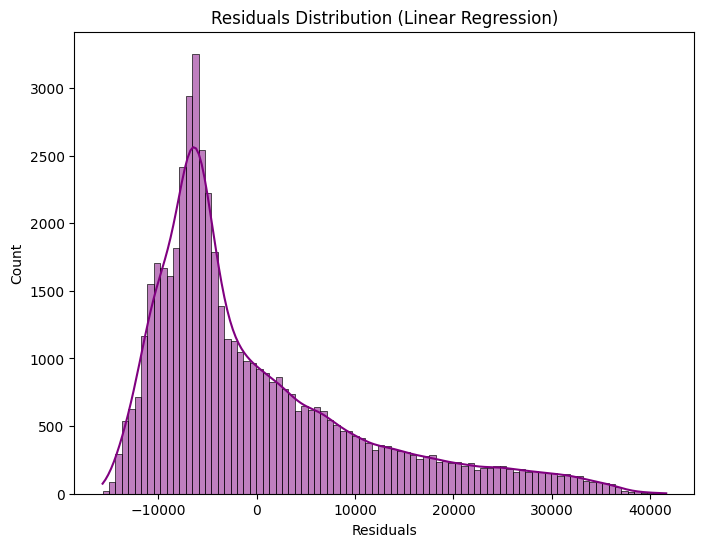

In [76]:
# Linear/Logistic Regression
# Define is_classification to determine the type of problem
# Set it to False for regression, True for classification
is_classification = False  # This is a regression problem

if not is_classification:
    print("\n--- Linear Regression ---")
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred_linreg = linreg.predict(X_test)
    print("Linear Regression R2:", r2_score(y_test, y_pred_linreg))

    # Plot Actual vs Predicted
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred_linreg)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Linear Regression: Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.show()


    # Residual Plot
    residuals = y_test - y_pred_linreg
    plt.figure(figsize=(8,6))
    sns.histplot(residuals, kde=True, color="purple")
    plt.title("Residuals Distribution (Linear Regression)")
    plt.xlabel("Residuals")
    plt.show()

else:
    print("\n--- Logistic Regression ---")
    # ... (rest of the code for logistic regression) ...

In [ ]:
# Done
print("\n✅ All Machine Learning operations completed successfully with beautiful plots!")
